Logistic Resgression[The Ultimate Halloween Candy Power Ranking, Epicurious - Recipes with Rating and Nutrition]

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#data= pd.read_csv('/content/drive/My Drive/Dataset/weatherHistory.csv')
data= pd.read_csv('/content/drive/My Drive/Dataset/candy-data.csv')
data

Mounted at /content/drive


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
data= data.drop("competitorname", axis='columns')
data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.1 KB


In [ ]:
def swap_columns(data, col1, col2):
    col_list = list(data.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    data= data[col_list]
    return data

#swap points and rebounds columns
data= swap_columns(data, 'chocolate', 'winpercent')

#view updated DataFrame
print(data)

    winpercent  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
0    66.971725       0        1               0       0                 1   
1    67.602936       0        0               0       1                 0   
2    32.261086       0        0               0       0                 0   
3    46.116505       0        0               0       0                 0   
4    52.341465       1        0               0       0                 0   
..         ...     ...      ...             ...     ...               ...   
80   45.466282       1        0               0       0                 0   
81   39.011898       1        0               0       0                 0   
82   44.375519       1        0               0       0                 0   
83   41.904308       0        1               0       0                 0   
84   49.524113       0        0               0       0                 1   

    hard  bar  pluribus  sugarpercent  pricepercent  chocolate  
0      0  

In [ ]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   winpercent        85 non-null     float64
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  chocolate         85 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 8.1 KB


0    48
1    37
Name: chocolate, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


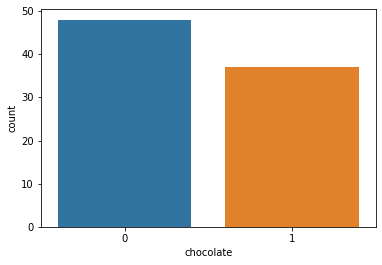

In [ ]:
y=data["chocolate"]
sns.countplot(y)
target_temp = data.chocolate.value_counts()
print(target_temp)

<Figure size 2016x1440 with 0 Axes>

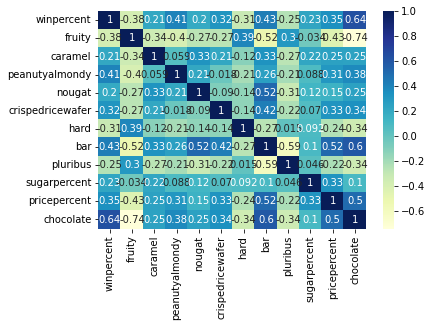

<Figure size 2016x1440 with 0 Axes>

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(28,20))

In [ ]:
x1 = data.iloc[:,0:10].values
y1 = data.iloc[:,11].values
x1=pd.DataFrame(x1)
from sklearn.model_selection import train_test_split  
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.30, random_state=0)  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x1_train= st_x.fit_transform(x1_train)    
x1_test= st_x.transform(x1_test) 

[[15  0]
 [ 2  9]]

True Positives(TP) =  15
True Negatives(TN) =  9
False Positives(FP) =  0
False Negatives(FN) =  2


Precision: 1.00000
Recall: 0.81818
F1 Score: 0.90000
Accuracy: 0.923


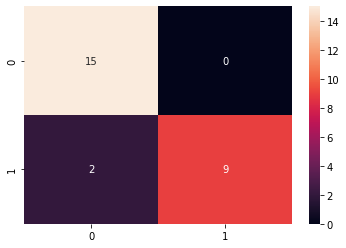

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

classifier= LogisticRegression()
classifier.fit(x1_train, y1_train)  
predictions = classifier.predict(x1_test)

cf_matrix=confusion_matrix(y1_test,predictions)
print(cf_matrix)

print('\nTrue Positives(TP) = ', cf_matrix[0,0])
print('True Negatives(TN) = ', cf_matrix[1,1])
print('False Positives(FP) = ', cf_matrix[0,1])
print('False Negatives(FN) = ', cf_matrix[1,0])
print('\n')
#print(classification_report(y_test,predictions))

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
    
print('Precision: %.5f' % metrics.precision_score(y1_test, predictions))
print('Recall: %.5f' % metrics.recall_score(y1_test, predictions))
print('F1 Score: %.5f' % metrics.f1_score(y1_test, predictions))
print('Accuracy: %.3f' % metrics.accuracy_score(y1_test, predictions))

Epicurious - Recipes with Rating and Nutrition:

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#data= pd.read_csv('/content/drive/My Drive/Dataset/weatherHistory.csv')
data= pd.read_csv('/content/drive/My Drive/Dataset/epi_r.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [ ]:
data.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [ ]:
data= data.drop("title", axis='columns')
data

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#data=data.count(0)
#data

rating        20052
calories      15935
protein       15890
fat           15869
sodium        15933
              ...  
cookbooks     20052
leftovers     20052
snack         20052
snack week    20052
turkey        20052
Length: 679, dtype: int64

In [ ]:
data = data[data['calories'] < 10000].dropna()
data

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = data.iloc[:,0:677].values
y = data.iloc[:,678].values
x=pd.DataFrame(x)
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
print(dfscores)
#dfcolumns =pd.DataFrame(x.columns.values.tolist())
dfcolumns =pd.DataFrame(data.columns.values.tolist())

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

                 0
0         3.493372
1     74396.193330
2     57267.362700
3      1643.203098
4    847975.461130
..             ...
672       0.108668
673       0.680986
674       0.043467
675      80.438752
676       0.456404

[677 rows x 1 columns]
              Features          Score
4               sodium  847975.461130
1             calories   74396.193330
2              protein   57267.362700
3                  fat    1643.203098
621       thanksgiving    1232.856756
496            poultry     880.268705
525              roast     372.558896
73               brine     171.909400
209               fall     126.322340
542           sandwich     123.330405
641         vegetarian     120.099445
467        pescatarian     101.859949
111             celery     101.186848
535               sage      93.902666
675          leftovers      80.438752
315             kosher      71.221722
181            dessert      64.070424
574          soup/stew      59.088659
565               side    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[3074   13]
 [  25   57]]

True Positives(TP) =  3074
True Negatives(TN) =  57
False Positives(FP) =  13
False Negatives(FN) =  25


Precision: 0.81429
Recall: 0.69512
F1 Score: 0.75000
Accuracy: 0.988


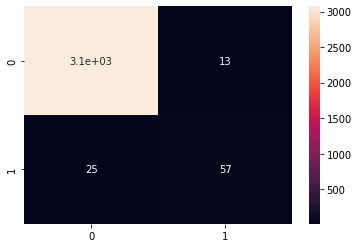

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

classifier= LogisticRegression()
classifier.fit(x_train, y_train)  
predictions = classifier.predict(x_test)

cf_matrix=confusion_matrix(y_test,predictions)
print(cf_matrix)

print('\nTrue Positives(TP) = ', cf_matrix[0,0])
print('True Negatives(TN) = ', cf_matrix[1,1])
print('False Positives(FP) = ', cf_matrix[0,1])
print('False Negatives(FN) = ', cf_matrix[1,0])
print('\n')
#print(classification_report(y_test,predictions))

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
    
print('Precision: %.5f' % metrics.precision_score(y_test, predictions))
print('Recall: %.5f' % metrics.recall_score(y_test, predictions))
print('F1 Score: %.5f' % metrics.f1_score(y_test, predictions))
print('Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))